In [1]:
#----------------------------------------------------------
# ハイパーパラメータなどの設定値
image_width = 28
image_height = 28

In [2]:
import torch
from torchvision import datasets, transforms
#----------------------------------------------------------
# 学習用／評価用のデータセットの作成

# 変換方法の指定
transform = transforms.Compose([
    transforms.ToTensor()
    ])

# MNISTデータの取得
# https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST
# 評価用
test_dataset = datasets.MNIST(
    './data', 
    train = False,
    transform = transform
    )

# データローダー
test_dataloader = torch.utils.data.DataLoader(
    test_dataset,     
    batch_size = 1,
    shuffle = True)

In [5]:
from imageClassifier import ImageClassifier
classifier = ImageClassifier(image_width, image_height)

incorrect = []
for image, label in test_dataloader:
	pred = classifier.predict(image[0])
	if pred != label[0]:
		incorrect.append([image[0], label[0], pred])
		# print(f"prediction = {pred[0]}, correct label = {label[0]}")

Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.
Got a torch.Tensor.


In [6]:
len(incorrect)
iterator = iter(incorrect)

prediction = 3, correct label= 9


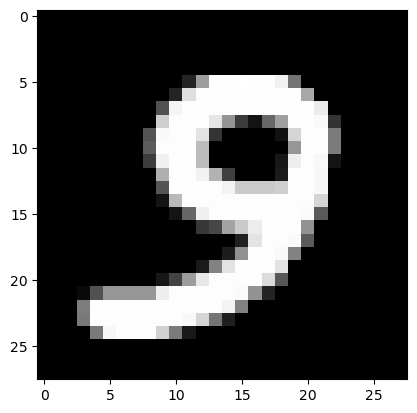

In [9]:
import matplotlib.pyplot as plt
image, label, pred = next(iterator)
# image[0].numpy().reshape((28,28))
print(f"prediction = {pred}, correct label= {label}")
plt.imshow(image.numpy().reshape((image_width,image_height)), cmap='gray')